<center><h2> Simulated Annealing for Sudoku

In this notebook we will solve a Sudoku using simulated annealing. For a Sudoku problem, it works in four steps.
Start by filling each column in the sudoku with the missing numbers. Doing this ensures that the correct numbers are already in the sudoku, all we need is to find the correct positions. 

1. Randomly swap two numbers in a random column
2. Calculate the number of rule breaks.
3. Accept the swap if the error decreases or with a certain probability
4. If accepted, lower the temperature parameter
Step 1-3 are the repeated until convergence.

The accept/reject mechanism works by calculating $\exp{(-\frac{(e' - e) }{T})}$ and accepting if the value is larger than $r \sim \mathcal{U}(0,1)$.
where $e'$ is the error from the proposed sudoku, $s$ is the current error and $T$ is the temperature parameter. The lower the temperature, the harder is is to accept proposals which increase the error. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Sudoku import Sudoku 
import copy

This uses a class called `Sudoku` which contains some functions for calculating errors, swapping elements and such. See code for more specifics.  

In [7]:
# Generate a generic sudoku board
n = 3
q = Sudoku(n**2, beta=0.5)
q

------------------------------------
|  0  0  3  | 0  5  6  | 7  8  9  |
|  4  0  0  | 0  0  0  | 0  2  0  |
|  7  0  9  | 0  0  0  | 4  0  0  |
------------------------------------
|  0  3  4  | 0  0  0  | 8  9  1  |
|  0  6  0  | 8  0  0  | 2  3  0  |
|  0  0  1  | 2  3  0  | 0  0  7  |
------------------------------------
|  3  0  5  | 6  7  0  | 0  0  2  |
|  0  7  0  | 9  1  0  | 0  4  0  |
|  9  1  2  | 3  4  5  | 0  0  8  |
------------------------------------

In [8]:
# Fill columns correctly and calculate error
q.fill_columns_uniquely()
error = q.error_count()
q
print('Error for this board is ', error)

Error for this board is  36.0


Now that we have a sudoku where all elements are members of the sudoku, but placed in the wrong row, we can start the simulated annealing.

In [9]:
# Set hyperparameters
T = 3; alpha=0.99

# Set stopping condition
thres = int(8e4)

# Preallocate for appending the error
err_array = np.zeros(shape=(thres,))

for c in range(0,thres):
    
    # Draw candidate
    q_new = copy.deepcopy(q)
    q_new.swap_two_elements_in_column(np.random.randint(0,n**2))
    
    # Calculate the error 
    error_new = q_new.error_count()
    
    # Accept/Reject
    if (error_new < error) | (np.exp(-(error_new - error)/T) > np.random.rand()):
        q = copy.deepcopy(q_new)
        error = error_new
        
        # Lower the temperature
        T = T*alpha
    
    # Save the error
    err_array[c] = error
    
    # Reset temperature if T to low (means that we are stuck in a local minimum)
    if T < 0.01:
        print('Resetting T')
        T = 2
        
    if error == 0:
        print('Solution found after ', c, ' iterations')
        print(q)
        break

Solution found after  988  iterations
------------------------------------
|  1  2  3  | 4  5  6  | 7  8  9  |
|  4  5  6  | 7  8  9  | 1  2  3  |
|  7  8  9  | 1  2  3  | 4  5  6  |
------------------------------------
|  2  3  4  | 5  6  7  | 8  9  1  |
|  5  6  7  | 8  9  1  | 2  3  4  |
|  8  9  1  | 2  3  4  | 5  6  7  |
------------------------------------
|  3  4  5  | 6  7  8  | 9  1  2  |
|  6  7  8  | 9  1  2  | 3  4  5  |
|  9  1  2  | 3  4  5  | 6  7  8  |
------------------------------------



If we were lucky, we found a solution to the sudoku. Let us see how the error behaves.

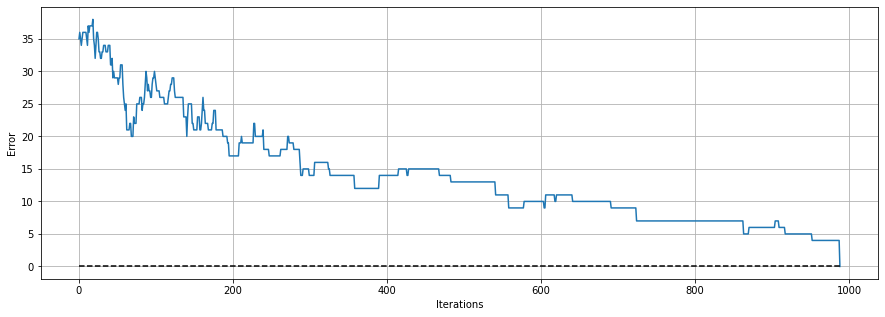

In [10]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(err_array[:c+1])
plt.plot(np.zeros(shape=(len(err_array[:c+1]),)), 'k--')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid()
plt.show()